# Data Fetching

### Nous récuperons les données à partir du fichier sqlite et on créeons un fichier csv distincts pour chaque table présente dans la base de donnéees

In [1]:
#IMPORTS
import sqlite3
import pandas as pd
#Enlever les warnings
import warnings
warnings.simplefilter("ignore")

#DATA FETCHING
dat = sqlite3.connect('../database/database.sqlite')

table = ["Country", "League", "X_Train", "X_Test","Player", "Player_Attributes",
         "Team", "Team_Attributes"]

csv = {}

for name in table:
    query = dat.execute("SELECT * From " + name)
    cols = [column[0] for column in query.description]
    results = pd.DataFrame.from_records(data=query.fetchall(), columns=cols)
    results.to_csv(r'../csv/'+name+'.csv')


### Transformation des fichiers csv en dataframes

In [2]:
matchsTrain = pd.read_csv('../csv/X_Train.csv')
matchsTest = pd.read_csv('../csv/X_Test.csv')
players = pd.read_csv('../csv/Player.csv')
teams = pd.read_csv('../csv/Team.csv')
team_attr = pd.read_csv('../csv/Team_Attributes.csv')
player_attr = pd.read_csv('../csv/Player_Attributes.csv')
countries = pd.read_csv('../csv/Country.csv')
leagues = pd.read_csv('../csv/League.csv')

## Exploration des données

#### Exploration du train set

Informations importantes à propos du training : 
- les colonnes home/away_player_XY représentent les coordonnées des X,Y des joueurs sur le terrain
- les colonnes home/away_player_i où 1<i<11 représentent l'api id des joueurs

In [3]:
matchsTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20479 entries, 0 to 20478
Data columns (total 79 columns):
Unnamed: 0          20479 non-null int64
index               20479 non-null int64
id                  20479 non-null int64
country_id          20479 non-null int64
league_id           20479 non-null int64
season              20479 non-null object
stage               20479 non-null int64
date                20479 non-null object
match_api_id        20479 non-null int64
home_team_api_id    20479 non-null int64
away_team_api_id    20479 non-null int64
home_team_goal      20479 non-null int64
away_team_goal      20479 non-null int64
home_player_X1      19033 non-null float64
home_player_X2      19033 non-null float64
home_player_X3      19025 non-null float64
home_player_X4      19025 non-null float64
home_player_X5      19025 non-null float64
home_player_X6      19025 non-null float64
home_player_X7      19025 non-null float64
home_player_X8      19025 non-null float64
home_player_

In [4]:
matchsTrain.describe()

,Unnamed: 0,index,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
count,20479.000000,20479.000000,20479.0000,20479.000000,20479.000000,20479.000000,2.047900e+04,20479.000000,20479.000000,20479.000000,...,19460.000000,19439.000000,19448.000000,19425.000000,19430.000000,19498.000000,19409.000000,19433.000000,19348.000000,19264.000000
mean,10239.000000,10239.000000,13018.8497,11766.815177,11766.815177,18.224132,1.196640e+06,9903.388105,10035.218272,1.538454,...,107215.875231,91067.257729,94952.167935,109937.905071,102434.662120,98161.155247,110213.809418,110629.648948,106639.449245,105447.734064
std,5911.922417,5911.922417,7492.2651,7551.399825,7551.399825,10.398607,4.950166e+05,13529.090615,14554.860615,1.296081,...,113465.530366,101884.382600,103884.329333,112726.177016,111247.146676,107130.925346,117246.374813,116002.144951,112511.966589,110469.160375
min,0.000000,0.000000,2.0000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,...,2790.000000,2752.000000,2752.000000,2790.000000,2625.000000,2625.000000,2625.000000,2625.000000,2802.000000,2802.000000
25%,5119.500000,5119.500000,6540.5000,4769.000000,4769.000000,9.000000,7.684365e+05,8481.000000,8472.000000,1.000000,...,32574.000000,30464.000000,30617.000000,33579.000000,31058.000000,30930.000000,32836.000000,33421.000000,32572.000000,32748.000000
50%,10239.000000,10239.000000,13027.0000,10257.000000,10257.000000,18.000000,1.189713e+06,8697.000000,8696.000000,1.000000,...,42388.000000,39892.000000,41062.000000,46297.000000,41659.000000,41603.500000,46104.000000,45860.000000,45174.000000,43097.000000
75%,15358.500000,15358.500000,19485.5000,17642.000000,17642.000000,27.000000,1.709904e+06,9925.000000,9911.000000,2.000000,...,159854.000000,119007.000000,145561.000000,160243.000000,151079.000000,145538.000000,164031.000000,164089.000000,160194.000000,163205.000000
max,20478.000000,20478.000000,25979.0000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,...,748432.000000,705484.000000,728414.000000,746419.000000,722766.000000,750435.000000,717248.000000,722766.000000,722766.000000,726956.000000


In [5]:
matchsTrain.head()

,Unnamed: 0,index,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,0,0,11103,10257,10257,2010/2011,17,2010-12-19 00:00:00,888326,8533,...,231753.0,24235.0,41884.0,34320.0,31314.0,192574.0,27694.0,39232.0,30712.0,39540.0
1,1,1,16167,15722,15722,2009/2010,5,2009-08-29 00:00:00,673737,8245,...,13515.0,13533.0,69261.0,NaN,69599.0,NaN,NaN,NaN,NaN,NaN
2,2,2,11222,10257,10257,2010/2011,28,2011-03-06 00:00:00,888435,9882,...,150466.0,18500.0,25815.0,41380.0,39701.0,39264.0,73999.0,167634.0,39306.0,96598.0
3,3,3,11018,10257,10257,2010/2011,1,2010-08-29 00:00:00,888161,9976,...,27720.0,24235.0,41884.0,41892.0,31314.0,33888.0,41890.0,39232.0,30727.0,39540.0
4,4,4,25596,24558,24558,2013/2014,5,2013-08-10 00:00:00,1471657,9930,...,67349.0,16254.0,25815.0,25843.0,93223.0,113227.0,302079.0,30912.0,25860.0,71764.0


L'api id représente l'id sur lequel on pourra faire un "merge" du training set avec d'autres tables tels que Player Attributs, Team Attributs,...

### Conclusions : 
- En inspectant les premieres lignes du dataframe , on peut s'apercevoir que tous les matchs sont joués entre équipes d'un meme championnat (pas de matchs internationaux ni championnat europeen. Nous allons donc pas utiliser les tables Country et League


## Injection des attributs des differentes tables dans le training set (Visualisation des correlation entre differents attributs des differentes tables)

### Ajout du label

In [6]:
# Determine the label of the match (0: tie , 1: home team won, -1: home team lost)
def det_label(score1, score2):
    if(score1 == score2):
        return 0
    if(score1 < score2):
        return -1
    else:
        return 1


In [7]:
#On va travailler sur une copie du training set
matchsTrainCopy = matchsTrain.copy()
matchsTrainCopy['label'] = matchsTrainCopy.apply(lambda row: det_label(
            row['home_team_goal'], row['away_team_goal']), axis=1)

In [8]:
matchsTrainCopy['label'].value_counts()

 1    9367
-1    5939
 0    5173
Name: label, dtype: int64

Nous pouvons voir que l'équipe jouant à domicile gagne dans un peu moins de 50% des cas

### Exploration des attributes des équipes

Pour mieux visualiser les attributs liés aux équipes nous allons drop les attributs liés aux joueurs

In [9]:
matchsTrainCopy.drop(matchsTrainCopy.select(lambda col: col.startswith('home_player'), axis=1), axis=1, inplace=True)
matchsTrainCopy.drop(matchsTrainCopy.select(lambda col: col.startswith('away_player'), axis=1), axis=1, inplace=True)

In [10]:
matchsTrainCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20479 entries, 0 to 20478
Data columns (total 14 columns):
Unnamed: 0          20479 non-null int64
index               20479 non-null int64
id                  20479 non-null int64
country_id          20479 non-null int64
league_id           20479 non-null int64
season              20479 non-null object
stage               20479 non-null int64
date                20479 non-null object
match_api_id        20479 non-null int64
home_team_api_id    20479 non-null int64
away_team_api_id    20479 non-null int64
home_team_goal      20479 non-null int64
away_team_goal      20479 non-null int64
label               20479 non-null int64
dtypes: int64(12), object(2)
memory usage: 2.2+ MB


### Merge du training set avec le team attributes

In [11]:
mergedDf = matchsTrainCopy.merge(team_attr, left_on='home_team_api_id', right_on='team_api_id')
correlation = mergedDf.corrwith(mergedDf['label']).sort_values(ascending=False)

In [12]:
mergedDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111926 entries, 0 to 111925
Data columns (total 40 columns):
Unnamed: 0_x                      111926 non-null int64
index                             111926 non-null int64
id_x                              111926 non-null int64
country_id                        111926 non-null int64
league_id                         111926 non-null int64
season                            111926 non-null object
stage                             111926 non-null int64
date_x                            111926 non-null object
match_api_id                      111926 non-null int64
home_team_api_id                  111926 non-null int64
away_team_api_id                  111926 non-null int64
home_team_goal                    111926 non-null int64
away_team_goal                    111926 non-null int64
label                             111926 non-null int64
Unnamed: 0_y                      111926 non-null int64
id_y                              111926 non-nu

In [13]:
correlation

label                     1.000000
home_team_goal            0.620438
defencePressure           0.063225
chanceCreationShooting    0.035975
defenceAggression         0.030697
defenceTeamWidth          0.022133
chanceCreationPassing     0.019822
chanceCreationCrossing    0.016655
away_team_api_id          0.016592
buildUpPlayDribbling      0.007554
index                     0.005943
Unnamed: 0_x              0.005943
league_id                 0.001719
country_id                0.001719
id_x                     -0.000900
stage                    -0.002491
buildUpPlaySpeed         -0.006341
team_api_id              -0.014515
home_team_api_id         -0.014515
match_api_id             -0.025879
id_y                     -0.026587
Unnamed: 0_y             -0.026587
team_fifa_api_id         -0.039668
buildUpPlayPassing       -0.065467
away_team_goal           -0.630108
dtype: float64

In [14]:
mergedDf = mergedDf.dropna(how="any")

Avec SelectKBest

In [15]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
dfCopy = mergedDf.select_dtypes(['float64','int64'])

X = dfCopy.drop(dfCopy[['label']], axis=1)  
y = dfCopy['label']  
#On applique SelectKBest pour extraire les 10 meilleurs features
skb = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X,y)
scores = pd.DataFrame(fit.scores_) #On recupere le score
columns = pd.DataFrame(X.columns) # On recupere le nom des colonnes
#On concatene les 2 dataframes pour visualiser 
result = pd.concat([columns,scores],axis=1)
result.columns = ['Features','Score']
print(result.nlargest(10,'Score')) 

NameError: name 'bestfeatures' is not defined

#### Conclusion : 
- les deux colonnes qui se disinguent le plus par leurs correlations au label sont la defensePressure et le buildUpPlayPassing

### Merge du training set avec le player attributes

In [ ]:
#On va travailler sur une copie du training set
matchsTrainCopy = matchsTrain.copy()
matchsTrainCopy['label'] = matchsTrainCopy.apply(lambda row: det_label(
            row['home_team_goal'], row['away_team_goal']), axis=1)

In [ ]:
player_attr_home = player_attr.select_dtypes(include=['float64', 'int64'])
player_attr_away = player_attr.select_dtypes(include=['float64', 'int64'])
player_attr_home = player_attr.add_suffix('_home')
player_attr_away = player_attr.add_suffix('_away')

player_attr_home = player_attr_home.groupby(player_attr_home['player_api_id_home']).mean()
player_attr_away = player_attr_away.groupby(player_attr_away['player_api_id_away']).mean()

player_attr_home['player_api_id_home'] = player_attr_home.index
player_attr_away['player_api_id_away'] = player_attr_away.index


matchsTrainCopy = matchsTrainCopy.select_dtypes(include=['float64', 'int64'])

mergedDf = matchsTrainCopy.merge(
    player_attr_home, left_on='home_player_1', right_index=True)
mergedDf = matchsTrainCopy.merge(
    player_attr_away, left_on='away_player_1', right_index=True)

for i in range(2, 12):
    player_attr_home = player_attr.add_suffix('_'+str(i))
    player_attr_away = player_attr.add_suffix('_'+str(i))
    mergedDf = mergedDf.merge(
        player_attr_home, left_on='home_player_'+str(i), right_index=True)
    mergedDf = mergedDf.merge(
        player_attr_away, left_on='away_player_'+str(i), right_index=True)

correlation = mergedDf.corrwith(mergedDf['label']).sort_values(ascending=False)

In [ ]:
correlation

In [ ]:
mergedDf = mergedDf.dropna(how="any")

Avec SelectKBest

In [ ]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
dfCopy = mergedDf.select_dtypes(['float64','int64'])

X = dfCopy.drop(dfCopy[['label']], axis=1)  
y = dfCopy['label']  
#On applique SelectKBest pour extraire les 10 meilleurs features
skb = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X,y)
scores = pd.DataFrame(fit.scores_) #On recupere le score
columns = pd.DataFrame(X.columns) # On recupere le nom des colonnes
#On concatene les 2 dataframes pour visualiser 
result = pd.concat([columns,scores],axis=1)
result.columns = ['Features','Score']
print(result.nlargest(10,'Score')) 

### Conclusion:
- les attributs du gardien de l'équipe à l'extérieur ont une legere correlation inverse sur le label (au plus le gardien a de bons attributs au plus le label sera -1 cad l'équipe à l'extérieur remporte le match)
- En générale, il parait logique de se dire que les attributs des joueurs en générale vont affluer sur le resultat final d'un match (au plus une équipe a de bons joueurs par rapport à l'equipe adverse, au plus elle augmentera ses chances de gagner le match 

# Data Cleaning

In [ ]:
matchsTrainCopy = matchsTrain.copy()

In [ ]:
#Suppression des colonnes qui n'ont pas d'importances et que l'on ne va pas exploiter
matchsTrainCopy.drop(['country_id', 'league_id','match_api_id', 'Unnamed: 0'], axis=1, inplace=True)

L'attribut match_api_id est en relation avec l'id et l'attribut Unnamed: 0 est une copie de l'id. Ils nous sont pas consequent pas utils.

## Cleaning des valeurs Nan présentent dans le training set

In [ ]:
matchsTrainCopy.info()

Nous pouvons voir qu'il nous manque des données seulement dans les colonnes home/away_player_i et home/away_player_XYi où 1<i<11

Pour nettoyer les valeurs Nan , nous allons procéder par remplissage. Nous pouvons aussi supprimer les lignes mais ceci entrainera à une énorme réduction du training set. La suppression des colonnes est inconcevable ici.

In [ ]:
#Nombre de lignes apres la suppresion de toutes les lignes où un Nan est present
matchsTrainCopy.dropna(how='any').shape[0]

### Remplissage des colonnes home/away_player_i

Pour remplir les id des joueurs, le seul cas possible est le remplissage par 0. Le remplissage par la valeurs la plus récurrente ou la médiane n'ont pas de sens 

In [ ]:
#Nous remplissons les ids des joureurs manquants par 0
matchsTrainCopy[['home_player_'+str(i) for i in range(1,12)]].fillna(0)
matchsTrainCopy[['away_player_'+str(i) for i in range(1,12)]].fillna(0)


### Remplissage des colonnes home/away_player_XYi où 1<i<11

Pour remplir les coordonnées des joueurs , nous allons proceder par le remplissage par la valeur la plus récurrente. C'est le cas qui a le plus de sens lorsque l'on y regarde de plus pres. En effet, ...

In [ ]:
# Les coordonnées des joueurs (seuls données manquantes de la dataframe), 
# nous les remplissons par les valeurs qui reviennent le plus (mode)

matchsTrainCopy = matchsTrainCopy.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
matchsTrainCopy.info()

Il n'y a plus aucune valeur nulle

# Data Preparing (Engineering)

## Exploitation des coordonnées XY des joueurs

L'idée ici sera de transformer les coordonnées Y (nous n'allons pas utiliser les coordonnées X) en formation par exemple 442 

In [ ]:
matchsTrainCopy.drop(matchsTrainCopy.select(lambda col: col.startswith('home_player_X'), axis=1), axis=1, inplace=True)
matchsTrainCopy.drop(matchsTrainCopy.select(lambda col: col.startswith('away_player_X'), axis=1), axis=1, inplace=True)

In [ ]:
#Pour l'exemple, voici la premiere ligne du training set
matchsTrainCopy[['home_player_Y'+str(i) for i in range(1,12)]].iloc[0,:]

##### Nous allons compter les occurences des joueurs presents par lignes. Par exemple ici :
- 1 joueur sur la ligne 1 (le gardien)
- 4 joueurs sur la ligne 3 (defenseurs)
- 3 joueurs sur la ligne 5 (milieux)
- 1 joueur sur la ligne 8 (milieu-offensif)
- 2 joueurs sur la ligne 10 (attaquants)
Ce qui donne 4312 (les formations ne prennent pas en compte le gardien car il ne change jamais de place)

In [ ]:
from collections import Counter
#Fonction pour creer une formation apd des coordonnées Y des joureurs
def create_formation(row, home):
    list_form = list()  # Nous avons besoin d'une liste pour le Counter
    if(home):
        list_form = row.loc[row.index.str.startswith('home_player_Y')].tolist()[1:]  # Nous ne prenons pas le gardien
    else:
        list_form = row.loc[row.index.str.startswith('away_player_Y')].tolist()[1:]
        
    # Nous creeons un dictionnaire avec les occurences des positions des joueurs
    couter = Counter(list_form)
    couter_val = couter.values()
    # on concatene les valeurs pour arriver à la formation par ex : 442
    form = ''.join((str(e) for e in list(couter_val)))
    return form

In [ ]:
matchsTrainCopy['form_home'] = matchsTrainCopy.apply(lambda x: create_formation(x, True), axis=1)
matchsTrainCopy['form_away'] = matchsTrainCopy.apply(lambda x: create_formation(x, False), axis=1)

In [ ]:
matchsTrainCopy['form_home'].value_counts()

In [ ]:
matchsTrainCopy['form_away'].value_counts()

In [ ]:
#On drop les coordonnées Y
matchsTrainCopy.drop(matchsTrainCopy.select(lambda col: col.startswith('home_player_Y'), axis=1), axis=1, inplace=True)
matchsTrainCopy.drop(matchsTrainCopy.select(lambda col: col.startswith('away_player_Y'), axis=1), axis=1, inplace=True)

In [ ]:
#Graphique des formations à domicile en fonction du label
plt.figure(figsize=(17,5))
sns.barplot(x='form_home', y='label',data=matchsTrainCopy)

Explication: Nous pouvons voir que suivant certaine formations le label a tendance a être plus élevé. C'est à dire que suivant une certaine formation, une équipe aura plus de probailité de gagner un match

In [ ]:
#Graphique des formations à l'extérieur en fonction du label
plt.figure(figsize=(17,5))
sns.barplot(x='form_away', y='label',data=matchsTrainCopy)

## Ajout des notes générales des joueurs

Pour ajouter les notes des joueurs, nous allons créer un dictionnaire avec comme clé un tuple avec l'api id et la date et comme valeur sa note générale ( En effet, la note d'un joueur varie en fonction du temps et un même joueur a donc plusieurs notes dans la table Players Attributes

In [ ]:
def create_player_overall_dict(player_attr):
    ply_attr = player_attr[['player_api_id', 'overall_rating', 'date']]
    ply_attr['date'] = ply_attr['date'].apply(lambda x: x.split('-')[0]) # on retient seulement l'année
    ply_attr = ply_attr.groupby([ply_attr['player_api_id'], ply_attr['date']]).mean()

    return ply_attr.to_dict()['overall_rating']

ply_attr_overall_dict = create_player_overall_dict(player_attr)

Dans la table Players Attributs, il est possible qu'un joueur n'ai pas une note à une certaine date. Ce qui va provoquer un crash lorsqu'on voudra acceder à cette clé là (id,date)

In [ ]:
def dict_key_checker(attr_dict, api_id, date):
    if(api_id == 0):
        return 0
    try:
        res = attr_dict[(api_id, str(date))]
    except KeyError:
        date = int(date)
        dates = [int(k[1]) for k in attr_dict if k[0] == api_id]
        if not dates:  # si l'api id n'est pas présente dans le dictionnaire
            return 0
        res = attr_dict[(api_id, str(min(dates, key=lambda key: abs(key-date))))] # si la date est pas présente , 
        #on prend la date la plus proche
    return res

In [ ]:
for i in range(1, 12):
    matchsTrainCopy['home_player_overall_'+str(i)] = matchsTrainCopy.apply(lambda x: 
            dict_key_checker(ply_attr_overall_dict, int(x['home_player_'+str(i)]), x['date'].split('-')[0])/99, axis=1)
    matchsTrainCopy['away_player_overall_'+str(i)] = matchsTrainCopy.apply(lambda x: 
            dict_key_checker(ply_attr_overall_dict, int(x['away_player_'+str(i)]), x['date'].split('-')[0])/99, axis=1)

Nous divisons la note par 99 car la note générale est une note entre 0 et 99. Ca nous permettera déjà de normaliser la note et se retrouver avec une valeur entre 0 et 1

In [ ]:
matchsTrainCopy.head()

In [ ]:
matchsTrainCopy.corrwith(matchsTrainCopy['label']).sort_values(ascending=False)[1:]

## Ajout du potentiel des joueurs

Nous recommencons la meme manipulation pour ajouter le potentiel des joueurs

In [ ]:
def create_player_pot_dict(player_attr):
    ply_attr = player_attr[['player_api_id', 'potential', 'date']]
    ply_attr['date'] = ply_attr['date'].apply(lambda x: x.split('-')[0])
    ply_attr = ply_attr.groupby([ply_attr['player_api_id'], ply_attr['date']]).mean()

    return ply_attr.to_dict()['potential']

ply_attr_pot_dict = create_player_pot_dict(player_attr)

for i in range(1, 12):
    matchsTrainCopy['home_player_potential_'+str(i)] = matchsTrainCopy.apply(lambda x: 
        dict_key_checker(ply_attr_pot_dict, int(x['home_player_'+str(i)]), x['date'].split('-')[0])/99, axis=1)
    matchsTrainCopy['away_player_potential_'+str(i)] = matchsTrainCopy.apply(lambda x: 
        dict_key_checker(ply_attr_pot_dict, int(x['away_player_'+str(i)]), x['date'].split('-')[0])/99, axis=1)

In [ ]:
matchsTrainCopy.corrwith(matchsTrainCopy['label']).sort_values(ascending=False)[1:]

## Ajout des attributs defensePressure et le buildUpPlayPassing 

In [ ]:
def create_team_attr_dict(teams_attr, key):
    tms_attr = teams_attr[['team_api_id', 'date','defencePressure', 'buildUpPlayPassing']]
    tms_attr['date'] = tms_attr['date'].apply(lambda x: x.split('-')[0])
    tms_attr = tms_attr.groupby([tms_attr['team_api_id'], tms_attr['date']]).mean()
    return tms_attr.to_dict()[key]

teams_buildUp_dict = create_team_attr_dict(team_attr, 'buildUpPlayPassing')
teams_def_press_dict = create_team_attr_dict(team_attr, 'defencePressure')

matchsTrainCopy['home_build_up'] = matchsTrainCopy.apply(lambda x: 
        dict_key_checker(teams_buildUp_dict, x['home_team_api_id'], x['date'].split('-')[0])/99, axis=1)
matchsTrainCopy['away_build_up'] = matchsTrainCopy.apply(lambda x: 
        dict_key_checker(teams_buildUp_dict, x['away_team_api_id'], x['date'].split('-')[0])/99, axis=1)
matchsTrainCopy['home_def_press'] = matchsTrainCopy.apply(lambda x: 
        dict_key_checker(teams_def_press_dict, x['home_team_api_id'], x['date'].split('-')[0])/99, axis=1)
matchsTrainCopy['away_def_press'] = matchsTrainCopy.apply(lambda x: 
        dict_key_checker(teams_def_press_dict, x['away_team_api_id'], x['date'].split('-')[0])/99, axis=1)

In [ ]:
matchsTrainCopy.corrwith(matchsTrainCopy['label']).sort_values(ascending=False)[1:]

## Exploitation des notes générales / potentiel des joueurs et de la formation

Une idée que l'on pourrait avoir pour réduire le nombre de colonnes du training set est, grace à la formation, de faire une moyenne des notes d'une équipe par ligne ( défense , milieu et attaque)  

In [ ]:
def get_nbr_players_by_lines(form):
    list_form = list(form)
    list_form = [int(x) for x in list_form]
    defenders = list_form[0] + 1  # le nombre de joueur sur la premiere ligne de la formation plus le gardien
    attackers = list_form[-1] # le nombre de joueur sur la derniere ligne de la formation
    midfielders = sum(list_form[1:-1]) # la somme des joueurs entre les ligne de defense et d'attaque
    return defenders, midfielders, attackers

In [ ]:
for index, row in matchsTrainCopy.iterrows():
    nbr_def_home, nbr_mid_home, nbr_att_home = get_nbr_players_by_lines(row['form_home'])
    nbr_def_away, nbr_mid_away, nbr_att_away = get_nbr_players_by_lines(row['form_away'])

    # Overall
    matchsTrainCopy.loc[index, 'home_def_overall'] = row.loc[[
                'home_player_overall_' + str(i) for i in range(1, nbr_def_home+1)]].mean()
    matchsTrainCopy.loc[index, 'home_mid_overall'] = row.loc[[
                'home_player_overall_' + str(i) for i in range(nbr_def_home+1, nbr_def_home + nbr_mid_home+1)]].mean()
    matchsTrainCopy.loc[index, 'home_att_overall'] = row.loc[[
                'home_player_overall_' + str(i) for i in range(nbr_def_home + nbr_mid_home+1, 12)]].mean()

    matchsTrainCopy.loc[index, 'away_def_overall'] = row.loc[[
                'away_player_overall_' + str(i) for i in range(1, nbr_def_away+1)]].mean()
    matchsTrainCopy.loc[index, 'away_mid_overall'] = row.loc[[
                'away_player_overall_' + str(i) for i in range(nbr_def_away+1, nbr_def_away + nbr_mid_away+1)]].mean()
    matchsTrainCopy.loc[index, 'away_att_overall'] = row.loc[[
                'away_player_overall_' + str(i) for i in range(nbr_def_away + nbr_mid_away+1, 12)]].mean()


    # Potential
    matchsTrainCopy.loc[index, 'home_def_pot'] = row.loc[[
        'home_player_potential_' + str(i) for i in range(1, nbr_def_home+1)]].mean()
    matchsTrainCopy.loc[index, 'home_mid_pot'] = row.loc[[
        'home_player_potential_' + str(i) for i in range(nbr_def_home+1, nbr_def_home + nbr_mid_home+1)]].mean()
    matchsTrainCopy.loc[index, 'home_att_pot'] = row.loc[[
        'home_player_potential_' + str(i) for i in range(nbr_def_home + nbr_mid_home+1, 12)]].mean()

    matchsTrainCopy.loc[index, 'away_def_pot'] = row.loc[[
        'away_player_potential_' + str(i) for i in range(1, nbr_def_away+1)]].mean()
    matchsTrainCopy.loc[index, 'away_mid_pot'] = row.loc[[
        'away_player_potential_' + str(i) for i in range(nbr_def_away+1, nbr_def_away + nbr_mid_away+1)]].mean()
    matchsTrainCopy.loc[index, 'away_att_pot'] = row.loc[[
        'away_player_potential_' + str(i) for i in range(nbr_def_away + nbr_mid_away+1, 12)]].mean()


In [ ]:
#On supprime les colonnes qui ne nous serviront plus
matchsTrainCopy.drop(matchsTrainCopy.select(lambda col: col.startswith('home_player'), axis=1), axis=1, inplace=True)
matchsTrainCopy.drop(matchsTrainCopy.select(lambda col: col.startswith('away_player'), axis=1), axis=1, inplace=True)

In [ ]:
matchsTrainCopy.info()

In [ ]:
matchsTrainCopy.corrwith(matchsTrainCopy['label']).sort_values(ascending=False)[1:]

Nous pouvons voir que nous avons augmenté le score des correlations des notes géneraux de joueurs ainsi que leur potentiel en prennant les joueurs par ligne de champs!

## Rapport entre les attributs de l'équipe à domicile et à l'extérieur

L'idée ici sera d'effectuer un rapport (une difference) entre les colonnes des differents attributs des équipes domicile et extérieur. En effet cette difference, si elle est positif représentera une correlation positive avec le label , si négative une correlation négative

In [ ]:
#Difference entre les 2 defenses , les 2 milieux et les 2 attaques
matchsTrainCopy['diff_def_overall'] = matchsTrainCopy['home_def_overall'] - matchsTrainCopy['away_def_overall']
matchsTrainCopy['diff_mid_overall'] = matchsTrainCopy['home_mid_overall'] - matchsTrainCopy['away_mid_overall']
matchsTrainCopy['diff_att_overall'] = matchsTrainCopy['home_att_overall'] - matchsTrainCopy['away_att_overall']

#Difference entre les ligne à confrontation direct c'est à dire l'attaque de l'équipe à domicile contre la defence 
# de l'équipe à l'extérieur ainsi que la defence domicile contre l'attaque extérieur
matchsTrainCopy['diff_att_home_def_away'] = matchsTrainCopy['home_att_overall'] - matchsTrainCopy['away_def_overall']
matchsTrainCopy['diff_def_home_att_away'] = matchsTrainCopy['home_def_overall'] - matchsTrainCopy['away_att_overall']

#Idem pour le potentiel
matchsTrainCopy['diff_def_pot'] = matchsTrainCopy['home_def_pot'] - matchsTrainCopy['away_def_pot']
matchsTrainCopy['diff_mid_pot'] = matchsTrainCopy['home_mid_pot'] - matchsTrainCopy['away_mid_pot']
matchsTrainCopy['diff_att_pot'] = matchsTrainCopy['home_att_pot'] - matchsTrainCopy['away_att_pot']

#Difference entre les 2 attributs d'equipe defensePressure et le buildUpPlayPassing
matchsTrainCopy['diff_build_up'] = matchsTrainCopy['home_build_up'] - matchsTrainCopy['away_build_up']
matchsTrainCopy['diff_def_press'] = matchsTrainCopy['home_def_press'] - matchsTrainCopy['away_def_press']


In [ ]:
matchsTrainCopy.info()

In [ ]:
matchsTrainCopy = matchsTrainCopy.drop(['home_build_up','away_build_up','home_def_press','away_def_press','home_def_overall',
                                     'home_mid_overall','home_att_overall','away_def_overall','away_mid_overall',
                                     'away_att_overall','home_def_pot','home_mid_pot','home_att_pot','away_def_pot',
                                     'away_mid_pot','away_att_pot'], axis=1)


In [ ]:
matchsTrainCopy.info()

In [ ]:
matchsTrainCopy.corrwith(matchsTrainCopy['label']).sort_values(ascending=False)[1:]

### Visualisation

In [35]:
matchsTrainCopy = matchsTrainCopy.drop(['index', 'home_team_api_id', 'away_team_api_id', 'stage'], axis=1)

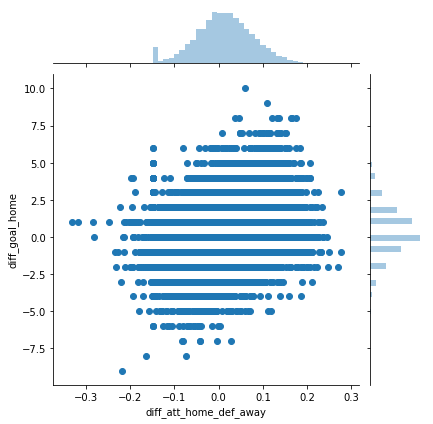

In [36]:
#Difference de but entre l'équipe à domicile et à l'extérieur
matchsTrainCopy['diff_goal_home'] = matchsTrainCopy['home_team_goal'] - matchsTrainCopy['away_team_goal']
sns.jointplot(x = 'diff_att_home_def_away' , y='diff_goal_home' , data=matchsTrainCopy)

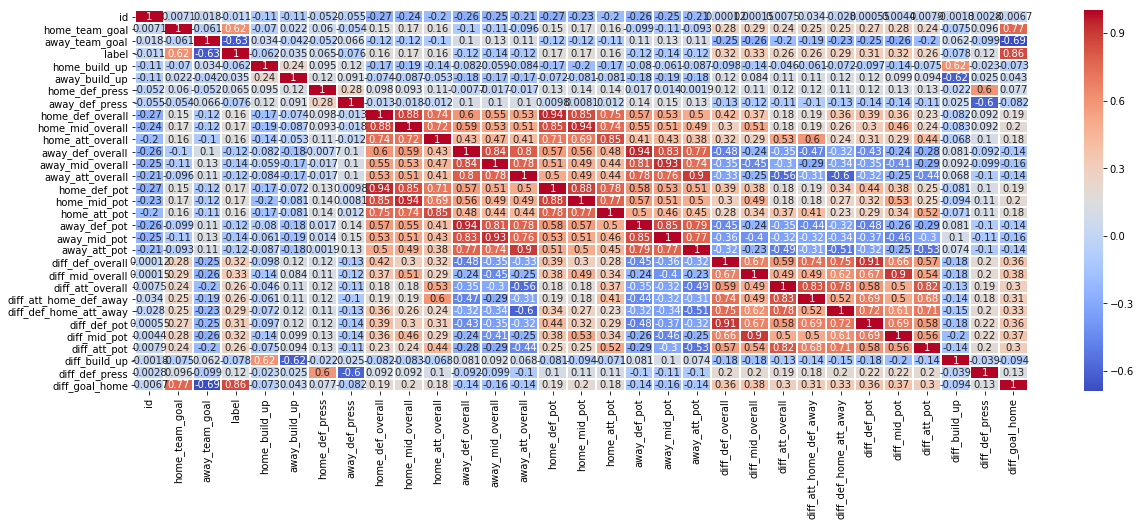

In [38]:
plt.figure(figsize=(20,7))
sns.heatmap(matchsTrainCopy.corr(),annot=True,cmap='coolwarm', linewidths=1)

### Idées de transformation des données qui n'ont pas abouties
- Prendre des données statistiques à partir du training set comme le nombre totals des buts inscrits par une equipe , le nombre de victoire à domicile , le taux de victoire d'une équipe ou le aux de victoire d'une équipe à domicile dans les confrontations direct avec l'équipe extérieur => ces données repésentaient un risque d'overfitting c'est pourquoi cette idée n'a pas aboutie
- PCA